In [1]:
import numpy
import numpy as np
import time
import datetime
import netCDF4
import matplotlib.pylab as plt
import os,sys,glob
sys.path.append(os.getcwd()+'/../adjust/rasotools/')
from utils import *
from multiprocessing import Pool
#import odb
from eccodes import *
from functools import partial
from collections import OrderedDict
import subprocess
import json
import gzip
# from retrieve_fb_jra55 import add_feedback
import copy
import pickle

import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as maplt

plt.rcParams['lines.linewidth'] = 3

import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.getcwd()+'/../cds-backend/code/')
import cds_eua3 as eua
import trajectory as trj

In [112]:
stat = '11035'
statlist = glob.glob('/mnt/users/scratch/leo/scratch/converted_v7/*' + stat + '*_CEUAS_merged_v1.nc')
df = eua.CDMDataset(filename = statlist[0]).to_dataframe(groups=['observations_table', 'era5fb'], variables=['latitude', 'longitude', 'observed_variable', 'observation_value', 'z_coordinate', 'date_time', 'fg_depar@body', 'an_depar@body'])

In [113]:
df

,latitude,longitude,observed_variable,observation_value,z_coordinate,date_time,fg_depar@body,an_depar@body
0,48.320000,16.120001,0,98300.000000,NaN,1949-04-08 03:00:00,0.000000,0.000000
1,48.320000,16.120001,0,98300.000000,NaN,1949-04-08 03:00:00,0.000000,0.000000
2,48.320000,16.120001,0,99300.000000,NaN,1949-04-12 03:00:00,0.000000,0.000000
3,48.320000,16.120001,0,99300.000000,NaN,1949-04-12 03:00:00,0.000000,0.000000
4,48.320000,16.120001,0,99100.000000,NaN,1949-04-13 03:00:00,0.000000,0.000000
...,...,...,...,...,...,...,...,...
67784821,48.248772,16.357679,140,-0.291076,97310.0,2020-12-29 13:16:08,-2.183560,-2.935349
67784822,48.248951,16.357180,140,0.088295,97780.0,2020-12-29 23:32:03,-0.477231,-1.535151
67784823,48.248951,16.357180,140,-0.000000,98100.0,2020-12-30 11:30:08,1.442932,0.178675
67784824,48.248951,16.357180,140,-0.113302,98550.0,2020-12-30 23:31:43,0.491889,0.944099


In [114]:
test = df[df.date_time == '2020-12-30 23:31:43']

In [115]:
t = test[test.observed_variable == 85]

In [116]:
u = test[test.observed_variable == 104]

In [117]:
v = test[test.observed_variable == 105]

In [128]:
u = u[np.isin(u.z_coordinate, t.z_coordinate)]
v = v[np.isin(v.z_coordinate, t.z_coordinate)]

In [130]:
u

,latitude,longitude,observed_variable,observation_value,z_coordinate,date_time,fg_depar@body,an_depar@body
36913531,48.248951,16.35718,104,77.072670,740.0,2020-12-30 23:31:43,2.938457,3.455352
36913532,48.248951,16.35718,104,77.041481,750.0,2020-12-30 23:31:43,2.702014,3.196370
36913533,48.248951,16.35718,104,77.080879,760.0,2020-12-30 23:31:43,2.538881,3.010996
36913534,48.248951,16.35718,104,76.791275,770.0,2020-12-30 23:31:43,2.049387,2.499552
36913535,48.248951,16.35718,104,77.891525,780.0,2020-12-30 23:31:43,2.892118,3.334276
...,...,...,...,...,...,...,...,...
36917911,48.248951,16.35718,104,2.159580,98220.0,2020-12-30 23:31:43,0.357838,0.363971
36917912,48.248951,16.35718,104,2.068096,98280.0,2020-12-30 23:31:43,0.266354,0.272487
36917913,48.248951,16.35718,104,1.876608,98350.0,2020-12-30 23:31:43,0.074866,0.080999
36917914,48.248951,16.35718,104,1.683456,98360.0,2020-12-30 23:31:43,-0.118287,-0.112153


In [119]:
t

,latitude,longitude,observed_variable,observation_value,z_coordinate,date_time,fg_depar@body,an_depar@body
29056825,48.248951,16.35718,85,239.820007,740.0,2020-12-30 23:31:43,-3.022666,-2.534839
29056826,48.248951,16.35718,85,240.309998,750.0,2020-12-30 23:31:43,-2.478773,-1.951864
29056827,48.248951,16.35718,85,239.899994,760.0,2020-12-30 23:31:43,-2.834881,-2.268890
29056828,48.248951,16.35718,85,237.589996,770.0,2020-12-30 23:31:43,-5.090988,-4.485915
29056829,48.248951,16.35718,85,236.880005,780.0,2020-12-30 23:31:43,-5.693474,-5.067399
...,...,...,...,...,...,...,...,...
29061205,48.248951,16.35718,85,276.369995,98220.0,2020-12-30 23:31:43,-0.531913,-1.620881
29061206,48.248951,16.35718,85,276.329987,98280.0,2020-12-30 23:31:43,-0.604089,-1.693184
29061207,48.248951,16.35718,85,276.329987,98350.0,2020-12-30 23:31:43,-0.641608,-1.730850
29061208,48.248951,16.35718,85,276.369995,98360.0,2020-12-30 23:31:43,-0.606966,-1.696230


In [120]:
phys_model = trj.trajectory(lat=t.latitude.iloc[0], lon=t.longitude.iloc[0], temperature=np.array(t.observation_value), u=np.array(u[np.isin(u.z_coordinate, t.z_coordinate)].observation_value), v=np.array(v[np.isin(v.z_coordinate, t.z_coordinate)].observation_value), pressure=np.array(t.z_coordinate))

In [123]:
phys_model[0]

[0.0,
 0.01963255581407708,
 0.039007906260504654,
 0.05798936478392491,
 0.07670435662041797,
 0.09554034167572922,
 0.11445185754663001,
 0.13304497756708145,
 0.1511013635864522,
 0.16864581923148236,
 0.18573744868743702,
 0.2024710897286255,
 0.21901091933513328,
 0.23546540214771738,
 0.2519227703488376,
 0.2683608489818212,
 0.284733808025873,
 0.301006924558056,
 0.3171006462479511,
 0.33296601596340736,
 0.34856992610502147,
 0.36389324021893543,
 0.3790223103155075,
 0.3939762853412532,
 0.4086842748950925,
 0.42312523426168447,
 0.43733091747204256,
 0.45138819898113347,
 0.4653531142100693,
 0.47927239187610304,
 0.4931036091113352,
 0.5067931690739993,
 0.5204555357799183,
 0.5341830826206682,
 0.547930759502762,
 0.5617314938767723,
 0.5755898307353995,
 0.589365291170239,
 0.6029619323304214,
 0.6164083109280885,
 0.6297174543869417,
 0.642850726045495,
 0.655763019175831,
 0.6684287375254048,
 0.6809681933034817,
 0.6935184578362925,
 0.706095872978759,
 0.7186647250671

In [145]:
input_data = t
input_data = input_data.rename(columns={'observation_value':'temperature'})
input_data['u'] = np.array(u.observation_value)
input_data['v'] = np.array(v.observation_value)

input_data = input_data.reindex(index=input_data.index[::-1])
input_data['z'] = np.array(trj.calc_height(np.array(input_data.temperature), np.array(input_data.z_coordinate), jump=False))
input_data['calc_latd'] = np.array(phys_model[0])
input_data['calc_lond'] = np.array(phys_model[1])

test1 = [0] + list(input_data.calc_lond[:-1])
test2 = [0] + list(input_data.calc_latd[:-1])
input_data['prev_calc_lond']= test1
input_data['prev_calc_latd']= test2

input_data['lat_diff'] = np.array(input_data.calc_latd)- np.array(input_data.prev_calc_latd)
input_data['lon_diff'] = np.array(input_data.calc_lond)- np.array(input_data.prev_calc_lond)


input_data.dropna()

,latitude,longitude,observed_variable,temperature,z_coordinate,date_time,fg_depar@body,an_depar@body,u,v,z,calc_latd,calc_lond,prev_calc_lond,prev_calc_latd,lat_diff,lon_diff
29061209,48.248951,16.35718,85,276.380005,98370.0,2020-12-30 23:31:43,-0.602324,-1.691608,1.394673,-0.122018,238.768914,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
29061208,48.248951,16.35718,85,276.369995,98360.0,2020-12-30 23:31:43,-0.606966,-1.696230,1.683456,-0.236594,239.591576,0.019633,0.003136,0.000000,0.000000,0.019633,3.136293e-03
29061207,48.248951,16.35718,85,276.329987,98350.0,2020-12-30 23:31:43,-0.641608,-1.730850,1.876608,-0.297225,240.414163,0.039008,0.006475,0.003136,0.019633,0.019375,3.338807e-03
29061206,48.248951,16.35718,85,276.329987,98280.0,2020-12-30 23:31:43,-0.604089,-1.693184,2.068096,-0.364661,246.173074,0.057989,0.010102,0.006475,0.039008,0.018981,3.627132e-03
29061205,48.248951,16.35718,85,276.369995,98220.0,2020-12-30 23:31:43,-0.531913,-1.620881,2.159580,-0.419780,251.113231,0.076704,0.014035,0.010102,0.057989,0.018715,3.932799e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29056829,48.248951,16.35718,85,236.880005,780.0,2020-12-30 23:31:43,-5.693474,-5.067399,77.891525,25.308493,32033.376064,3.082521,0.535602,0.535603,3.082516,0.000005,-8.288362e-07
29056828,48.248951,16.35718,85,237.589996,770.0,2020-12-30 23:31:43,-5.090988,-4.485915,76.791275,23.477448,32122.979602,3.082549,0.535598,0.535602,3.082521,0.000028,-3.484676e-06
29056827,48.248951,16.35718,85,239.899994,760.0,2020-12-30 23:31:43,-2.834881,-2.268890,77.080879,20.653759,32214.331415,3.082579,0.535595,0.535598,3.082549,0.000030,-3.428191e-06
29056826,48.248951,16.35718,85,240.309998,750.0,2020-12-30 23:31:43,-2.478773,-1.951864,77.041481,19.208599,32307.421239,3.082583,0.535594,0.535595,3.082579,0.000004,-3.948634e-07


In [146]:
with open('model_dt_4s_reduced_prev.p', "rb") as input_file:
    model = pickle.load(input_file)

In [149]:
out = model.predict(input_data[['temperature', 'z_coordinate', 'u', 'v', 'z','latitude', 'longitude' , 'calc_latd', 'calc_lond', 'prev_calc_lond', 'prev_calc_latd', 'lon_diff', 'lat_diff']])

In [153]:
ml_latd, ml_lond = out.transpose()

In [154]:
ml_latd

array([-1.06666667e-04,  3.17000000e-03,  1.25087500e-02, ...,
        7.66028333e-01,  7.66028333e-01,  7.66028333e-01])

In [11]:
import xarray as xr

In [33]:
ds = xr.load_dataset("./PROGRAMS/outputtest.grib")

In [99]:
ds

<xarray.Dataset>
Dimensions:           (entireAtmosphere: 137, latitude: 640, longitude: 1280)
Coordinates:
    number            int64 0
    time              datetime64[ns] 2020-12-31T17:00:00
    step              timedelta64[ns] 00:00:00
  * entireAtmosphere  (entireAtmosphere) int64 1 2 3 4 5 ... 133 134 135 136 137
  * latitude          (latitude) float64 89.78 89.51 89.23 ... -89.51 -89.78
  * longitude         (longitude) float64 0.0 0.2813 0.5625 ... 359.4 359.7
    valid_time        datetime64[ns] 2020-12-31T17:00:00
Data variables:
    t                 (entireAtmosphere, latitude, longitude) float32 209.8 ....
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-02-10T10:33:34 GRIB to CDM+CF via cfgrib-0....

In [100]:
igrib = '/scratch/das/mayerj47/era5_sh/lnspana/2020/LNSPANASH202012311700.grib'
f = open(igrib)
print(f)
msgid = codes_new_from_file(f, product_kind=CODES_PRODUCT_GRIB)
print(msgid)
pv = codes_get_array(msgid,'pv')

<_io.TextIOWrapper name='/scratch/das/mayerj47/era5_sh/lnspana/2020/LNSPANASH202012311700.grib' mode='r' encoding='UTF-8'>
94153253540480


In [101]:
ds_lnsp = xr.load_dataset("./PROGRAMS/outputtest_lnsp.grib")

In [102]:
ds_lnsp

<xarray.Dataset>
Dimensions:           (latitude: 640, longitude: 1280)
Coordinates:
    number            int64 0
    time              datetime64[ns] 2020-12-31T23:00:00
    step              timedelta64[ns] 00:00:00
    entireAtmosphere  int64 1
  * latitude          (latitude) float64 89.78 89.51 89.23 ... -89.51 -89.78
  * longitude         (longitude) float64 0.0 0.2813 0.5625 ... 359.4 359.7
    valid_time        datetime64[ns] 2020-12-31T23:00:00
Data variables:
    lnsp              (latitude, longitude) float32 11.53 11.53 ... 11.13 11.13
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-02-11T13:15:11 GRIB to CDM+CF via cfgrib-0....

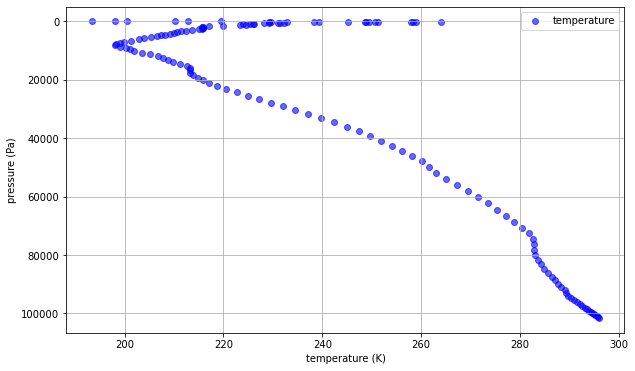

In [103]:
lnsp = float(ds_lnsp.sel(latitude=[21], longitude=[210], method="nearest").lnsp)
sp = np.exp(lnsp)

pv = np.array(pv)
a = pv[:int(len(pv)/2)]
b = pv[int(len(pv)/2):]

p_half=a + b * sp


t = ds.sel(latitude=[21], longitude=[210], method="nearest").t

fig, ax1 = maplt.subplots(1, figsize=(10, 6))
ax1.scatter(np.array(t), np.array(p_half[:-1]), color = 'blue', alpha = 0.6, label='temperature')
ax1.set_ylabel('pressure (Pa)')
ax1.set_xlabel('temperature (K)')
ax1.tick_params(axis='y')
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.legend()
ax1.grid()